In [69]:
import pandas as pd  
import numpy as np
from pmdarima.arima import auto_arima
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import os
import statsmodels

In [156]:
directory = 'C:/Users/bruce/Desktop/DMT-main/'
mse_list = []
mae_list = []
for filename in os.listdir(directory):
    if filename.endswith('.csv') and filename.startswith('AS14.'):
        df = pd.read_csv(os.path.join(directory, filename))
        ARIMATEST = pd.DataFrame()
        ARIMATEST = df.set_index('time')
        model = auto_arima(ARIMATEST['mood'], seasonal = False, suppress_warnings=True)
        #print(model.summary)
        train_size = int(0.8 * len(ARIMATEST))
        train_df = ARIMATEST.iloc[:train_size]
        test_df = ARIMATEST.iloc[train_size:]
        #print(test_df)
        model.fit(train_df['mood'])
        forecast = model.predict(n_periods=len(test_df), return_conf_int=True)
        #denormalized_predict = scaler.inverse_transform(forecast)
        forecast_df = pd.DataFrame(forecast[0],index = test_df.index,columns=['Prediction'])
        #test_df['mood'] = scaler.inverse_transform(test_df[['mood']])
        mse = mean_squared_error(test_df['mood'], forecast_df['Prediction'])
        mse_list.append((filename[:-4], mse))
        mae = mean_absolute_error(test_df['mood'], forecast_df['Prediction'])
        mae_list.append((filename[:-4], mae))


C:\Users\bruce\AppData\Local\Temp\ipykernel_20852\2860469682.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ids, rotation=90)
C:\Users\bruce\AppData\Local\Temp\ipykernel_20852\2860469682.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ids, rotation=90)


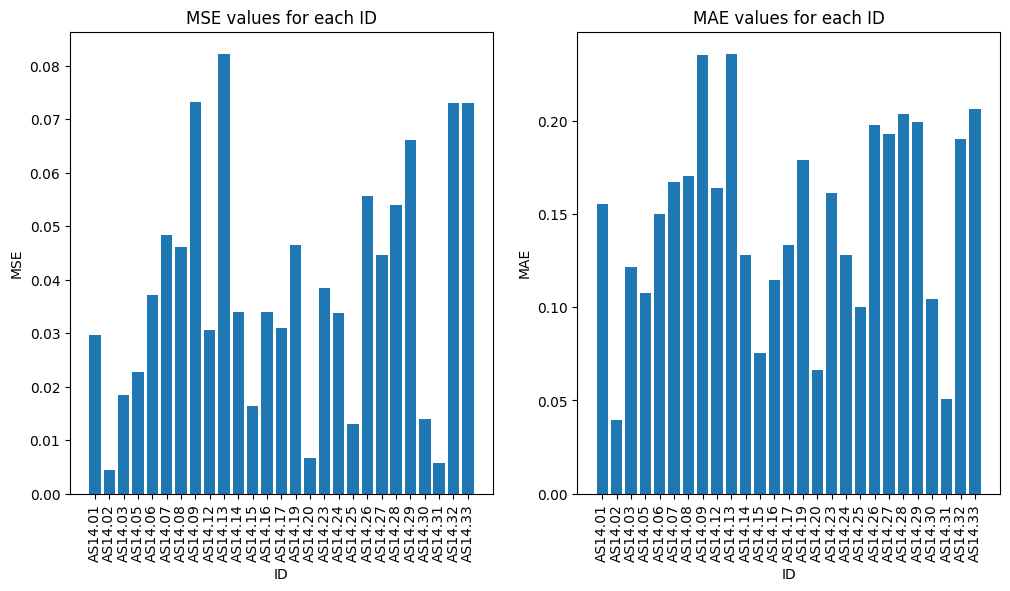

In [158]:
ids = [item[0] for item in mse_list]
mses = [item[1] for item in mse_list]
maes = [item[1] for item in mae_list]

# Creating the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the first subplot with the bar plot
ax1.bar(ids, mses)
ax1.set_xlabel('ID')
ax1.set_ylabel('MSE')
ax1.set_xticklabels(ids, rotation=90)
ax1.set_title('MSE values for each ID')

# Plotting the second subplot with another plot (replace with your own plot)
ax2.bar(ids, maes)
ax2.set_xlabel('ID')
ax2.set_ylabel('MAE')
ax2.set_xticklabels(ids, rotation=90)
ax2.set_title('MAE values for each ID')

# Displaying the plot
plt.show()

In [152]:
ARIMATEST = pd.read_csv('AS14.02.csv')
#ARIMATEST = pd.read_csv('AS14.03.csv')
ARIMATEST = ARIMATEST.set_index('time')
model = auto_arima(ARIMATEST['mood'], seasonal = False, suppress_warnings=True)
print(model.summary)


<bound method ARIMA.summary of ARIMA(order=(2, 0, 1), scoring_args={}, suppress_warnings=True)>


In [153]:
train_size = int(0.8 * len(ARIMATEST))
train_df = ARIMATEST.iloc[:train_size]
test_df = ARIMATEST.iloc[train_size:]
print(test_df)

                 id  activity  appCat.builtin  appCat.communication  \
time                                                                  
2014-04-17  AS14.02  0.337822        0.071443              0.161156   
2014-04-18  AS14.02  0.000000        0.000000              0.000000   
2014-04-19  AS14.02  0.337822        0.359171              0.310050   
2014-04-20  AS14.02  0.000000        0.000000              0.000000   
2014-04-21  AS14.02  0.000000        0.000000              0.000000   
2014-04-22  AS14.02  0.313775        0.000000              0.000000   
2014-04-23  AS14.02  0.597666        0.000000              0.000000   
2014-04-24  AS14.02  0.144264        0.000000              0.000000   
2014-04-25  AS14.02  0.000000        0.000000              0.000000   

            appCat.entertainment  appCat.other  appCat.social  call  \
time                                                                  
2014-04-17                   0.0           0.0       0.000000   1.0   
2014-

In [154]:
model = auto_arima(ARIMATEST['mood'], seasonal = False, suppress_warnings=True)
model.fit(train_df['mood'])
forecast=model.predict(n_periods= len(test_df), return_conf_int=True)
forecast_df = pd.DataFrame(forecast[0],index = test_df.index,columns=['Prediction'])
forecast_df

,Prediction
time,
2014-04-17,0.383902
2014-04-18,0.466578
2014-04-19,0.510489
2014-04-20,0.508925
2014-04-21,0.492457
2014-04-22,0.482662
2014-04-23,0.482315
2014-04-24,0.485550
2014-04-25,0.487706


In [150]:
mse = mean_squared_error(test_df['mood'], forecast_df['Prediction'])
mae = mean_absolute_error(test_df['mood'], forecast_df['Prediction'])
print(mae)

0.12500000008540596


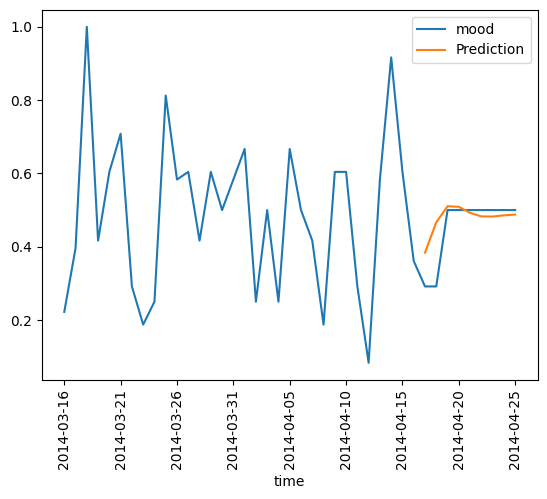

In [155]:
concat_df = pd.concat([ARIMATEST['mood'], forecast_df], axis=1)
concat_df.plot()
plt.xticks(rotation=90)

# Displaying the plot
plt.show()